# MALIGNANT COMMENTS CLASSIFICATION

In [76]:
##import all the needed libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer ,TfidfVectorizer
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix,roc_auc_score,precision_score,roc_curve,auc, recall_score
# Import ML algos
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [2]:
com_train=pd.read_csv("Malignant_comment_train.csv",header= 0, encoding= 'unicode_escape')

In [3]:
com_test=pd.read_csv("Malignant_comment_test.csv")

In [4]:
com_train.head()

id                                       comment_text  \
0  0000997932d777bf  Explanation\nWhy the edits made under my usern...   
1  000103f0d9cfb60f  D'aww! He matches this background colour I'm s...   
2  000113f07ec002fd  Hey man, I'm really not trying to edit war. It...   
3  0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...   
4  0001d958c54c6e35  You, sir, are my hero. Any chance you remember...   

   malignant  highly_malignant  rude  threat  abuse  loathe  
0        0.0               0.0   0.0     0.0    0.0     0.0  
1        0.0               0.0   0.0     0.0    0.0     0.0  
2        0.0               0.0   0.0     0.0    0.0     0.0  
3        0.0               0.0   0.0     0.0    0.0     0.0  
4        0.0               0.0   0.0     0.0    0.0     0.0

In [5]:
com_test.head

<bound method NDFrame.head of                       id                                       comment_text
0       00001cee341fdb12  Yo bitch Ja Rule is more succesful then you'll...
1       0000247867823ef7  == From RfC == \n\n The title is fine as it is...
2       00013b17ad220c46  " \n\n == Sources == \n\n * Zawe Ashton on Lap...
3       00017563c3f7919a  :If you have a look back at the source, the in...
4       00017695ad8997eb          I don't anonymously edit articles at all.
...                  ...                                                ...
153159  fffcd0960ee309b5  . \n i totally agree, this stuff is nothing bu...
153160  fffd7a9a6eb32c16  == Throw from out field to home plate. == \n\n...
153161  fffda9e8d6fafa9e  " \n\n == Okinotorishima categories == \n\n I ...
153162  fffe8f1340a79fc2  " \n\n == ""One of the founding nations of the...
153163  ffffce3fb183ee80  " \n :::Stop already. Your bullshit is not wel...

[153164 rows x 2 columns]>

In [6]:
len(com_train)

159572

In [7]:
com_train.isnull().any()

id                  False
comment_text        False
malignant            True
highly_malignant     True
rude                 True
threat               True
abuse                True
loathe               True
dtype: bool

In [8]:
com_train.columns

Index(['id', 'comment_text', 'malignant', 'highly_malignant', 'rude', 'threat',
       'abuse', 'loathe'],
      dtype='object')

In [9]:
com_test.columns

Index(['id', 'comment_text'], dtype='object')

In [10]:
com_test.isnull().any()

id              False
comment_text    False
dtype: bool

In [11]:
com_test.isnull().sum()

id              0
comment_text    0
dtype: int64

In [12]:
#drop "id" column 
com_train.drop(columns=['id'],axis=1,inplace=True)

In [13]:
com_test.drop(columns=['id'],axis=1,inplace=True)

In [14]:
com_train["comment_text"]=com_train["comment_text"].replace('"',np.nan)
com_test["comment_text"]=com_train["comment_text"].replace('"',np.nan)

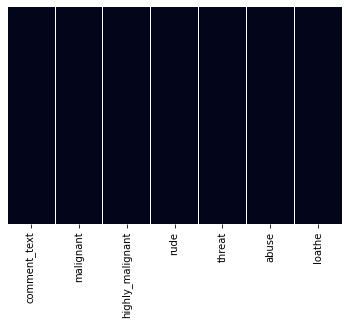

In [15]:
sns.heatmap(com_train.isnull(),yticklabels=False,cbar=False)

In [16]:
com_train.dropna(inplace=True)

In [17]:
com_test.dropna(inplace=True)

In [18]:
#convert all messages into lower case
com_train["comment_text"]=com_train["comment_text"].str.lower()

In [19]:
com_test["comment_text"]=com_test["comment_text"].str.lower()

In [20]:
com_train["length"]=com_train.comment_text.str.len()

In [21]:
com_test["length"]=com_test.comment_text.str.len()

In [22]:
#Replace numbers with 'numbr'
com_train["comment_text"]=com_train["comment_text"].str.replace(r'\d+(\.\d+)?','numbr')

In [23]:
com_test["comment_text"]=com_test["comment_text"].str.replace(r'\d+(\.\d+)?','numbr')

In [24]:
#Remove punctuations
com_train["comment_text"]=com_train["comment_text"].str.replace(r'[^\w\d\s]', ' ')
#Remove whitespace between terms with single space
com_train["comment_text"]=com_train["comment_text"].str.replace(r'\s+', ' ')
#Remove leading and trailing whitespace
com_train["comment_text"]=com_train["comment_text"].str.replace(r'\s+|\s+?$', ' ')

In [25]:
#Remove punctuations
com_test["comment_text"]=com_test["comment_text"].str.replace(r'[^\w\d\s]', ' ')
#Remove whitespace between terms with single space
com_test["comment_text"]=com_test["comment_text"].str.replace(r'\s+', ' ')
#Remove leading and trailing whitespace
com_test["comment_text"]=com_test["comment_text"].str.replace(r'\s+|\s+?$', ' ')

In [26]:
#Removing stopwords
import string
import nltk
from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [27]:
#Removing stopwords

stop_words=set(stopwords.words('english')+['u','ur','4','2','im',"don't",'doin','ure'])

com_train["comment_text"]=com_train["comment_text"].apply(lambda x: ' '.join(term for term in x.split()if term not in stop_words ))

In [28]:
com_test["comment_text"]=com_test["comment_text"].apply(lambda x: ' '.join(term for term in x.split()if term not in stop_words ))

In [29]:
#new column clean_length after removing punctuation and stop words
com_train['clean_comment_text']=com_train["comment_text"].str.len()

In [30]:
com_test['clean_comment_text']=com_test["comment_text"].str.len()

In [31]:
#Total lenth removal for trainning data
print("original length :",com_train.length.sum())
print("Clean Length :",com_train.clean_comment_text.sum())

original length : 62993997
Clean Length : 40640515


In [32]:
#Total lenth removal for testing data
print("original length :",com_test.length.sum())
print("Clean Length :",com_test.clean_comment_text.sum())

original length : 60499287
Clean Length : 39023407


In [33]:
# Check percentage of comments that are malignant compared to normal comments
com_train.malignant.value_counts(normalize=True)

0.0    0.904155
1.0    0.095845
Name: malignant, dtype: float64

In [34]:
com_count=com_train.iloc[:,1:7].sum()

In [35]:
com_count

malignant           15294.0
highly_malignant     1595.0
rude                 8449.0
threat                478.0
abuse                7877.0
loathe               1405.0
dtype: float64

Text(0.5, 0, 'Type ')

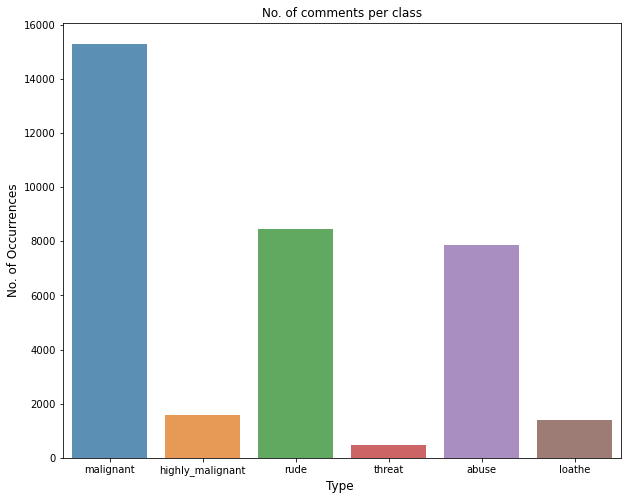

In [36]:
# Plot a chart with the following size
plt.figure(figsize=(10,8))

# Plot a bar chart using the index (category values) and the count of each category. alpha = 0.8 to make the bars more translucent
ax = sns.barplot(com_count.index, com_count.values, alpha=0.8)

plt.title("No. of comments per class")
plt.ylabel('No. of Occurrences', fontsize=12)
plt.xlabel('Type ', fontsize=12)

In [37]:
num_rows = len(com_train)
print(num_rows)

159570


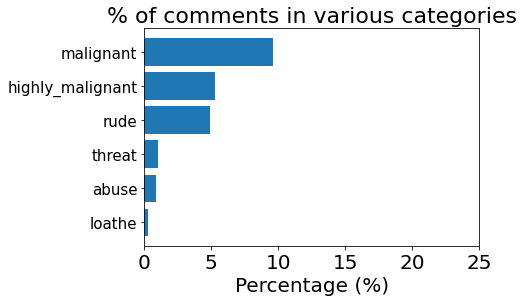

In [38]:
# Create a bar graph 
sum_tox = com_train['malignant'].sum() / num_rows * 100
sum_sev = com_train['highly_malignant'].sum() / num_rows * 100
sum_obs = com_train['rude'].sum() / num_rows * 100
sum_thr = com_train['threat'].sum() / num_rows * 100
sum_ins = com_train['abuse'].sum() / num_rows * 100
sum_ide = com_train['loathe'].sum() / num_rows * 100

# Initiate a list of 6 values that represent the 6 x-axis values for the categories
ind = np.arange(6)

# Let the ind variable be the x-axis, whereas the % of toxicity for each category be the y-axis.
# Sequence of % have been sorted manually. This method cannot be done if there are large numbers of categories.
ax = plt.barh(ind, [sum_tox, sum_obs, sum_ins, sum_sev, sum_ide, sum_thr])
plt.xlabel('Percentage (%)', size=20)
plt.xticks(np.arange(0, 30, 5), size=20)
plt.title('% of comments in various categories', size=22)
plt.yticks(ind, ('malignant', 'highly_malignant', 'rude', 'threat','abuse', 'loathe' ), size=15)

# Invert the graph so that it is in descending order.
plt.gca().invert_yaxis()
plt.show()

In [50]:
cols_target = ['malignant','highly_malignant','rude','threat','abuse','loathe']
target_data = com_train[cols_target]
com_train['bad'] =com_train[cols_target].sum(axis =1)
print(com_train['bad'].value_counts())
com_train['bad'] = com_train['bad'] > 0 
com_train['bad'] = com_train['bad'].astype(int)
print(com_train['bad'].value_counts())


0.0    143345
1.0      6360
3.0      4209
2.0      3480
4.0      1760
5.0       385
6.0        31
Name: bad, dtype: int64
0    143345
1     16225
Name: bad, dtype: int64


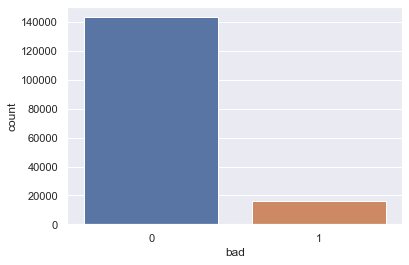

In [52]:
sns.set()
sns.countplot(x="bad" , data = com_train)
plt.show()

In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_vec = TfidfVectorizer(max_features = 10000, stop_words='english')
features = tf_vec.fit_transform(com_train['comment_text'])
x = features

In [55]:
com_train.shape


(159570, 10)

In [56]:
com_test.shape

(153164, 3)

In [57]:
y=com_train['bad']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=56)

In [58]:
y_train.shape,y_test.shape

((111699,), (47871,))

In [64]:
#LogisticRegression
LG = LogisticRegression(C=1, max_iter = 3000)

LG.fit(x_train, y_train)

y_pred_train = LG.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = LG.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9593192418911539
Test accuracy is 0.955568089239832
[[42753   212]
 [ 1915  2991]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     42965
           1       0.93      0.61      0.74      4906

    accuracy                           0.96     47871
   macro avg       0.95      0.80      0.86     47871
weighted avg       0.95      0.96      0.95     47871



In [65]:
# DecisionTreeClassifier
DT = DecisionTreeClassifier()

DT.fit(x_train, y_train)
y_pred_train = DT.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = DT.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9987734894672289
Test accuracy is 0.9415094733763657
[[41648  1317]
 [ 1483  3423]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     42965
           1       0.72      0.70      0.71      4906

    accuracy                           0.94     47871
   macro avg       0.84      0.83      0.84     47871
weighted avg       0.94      0.94      0.94     47871



In [66]:
#RandomForestClassifier
RF = RandomForestClassifier()

RF.fit(x_train, y_train)
y_pred_train = RF.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = RF.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9987645368356028
Test accuracy is 0.957301915564747
[[42435   530]
 [ 1514  3392]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     42965
           1       0.86      0.69      0.77      4906

    accuracy                           0.96     47871
   macro avg       0.92      0.84      0.87     47871
weighted avg       0.96      0.96      0.96     47871



In [71]:
#AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=100)
ada.fit(x_train, y_train)
y_pred_train = ada.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = ada.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9506799523719998
Test accuracy is 0.9488416786781141
[[42556   409]
 [ 2040  2866]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     42965
           1       0.88      0.58      0.70      4906

    accuracy                           0.95     47871
   macro avg       0.91      0.79      0.84     47871
weighted avg       0.95      0.95      0.94     47871



In [72]:
#KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train, y_train)
y_pred_train = knn.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = knn.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9223627785387515
Test accuracy is 0.9172359048275573
[[42769   196]
 [ 3766  1140]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     42965
           1       0.85      0.23      0.37      4906

    accuracy                           0.92     47871
   macro avg       0.89      0.61      0.66     47871
weighted avg       0.91      0.92      0.90     47871



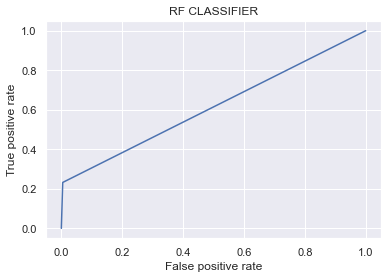

In [77]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_test)
roc_auc=auc(fpr,tpr)
plt.plot(fpr,tpr,label = 'RF Classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('RF CLASSIFIER')
plt.show()

In [78]:
test_data =tf_vec.fit_transform(com_test['comment_text'])
test_data

<153164x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 3230629 stored elements in Compressed Sparse Row format>

In [79]:
prediction=RF.predict(test_data)
prediction

array([0, 0, 0, ..., 0, 0, 0])

In [80]:
import joblib
joblib.dump(RF,"malig.pkl")

['malig.pkl']